## 8조 지하철 유무임 승하차 현항

### 필요한 라이브러리 임포트

In [21]:
import urllib.request
import json
import pandas as pd
from pandas.io.json import json_normalize
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

### api 크롤링 (for문 이용)

In [23]:
# 서울 열린데이터 광장에 가입후 인증키 수령
key = '70564c7369726172313135416c615451'

# 데이터 수집 시작일 지정
start_date = date(2019,1,1)

# 수집할 컬럼 생성 컬럼대로 데이터 수집
columns_name = (['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'PAY_RIDE_NUM', 'FREE_RIDE_NUM',
       'PAY_ALIGHT_NUM', 'FREE_ALIGHT_NUM', 'WORK_DT'])

# 데이터프레임 생성 - 컬럼명 맞추기
final_data1 = pd.DataFrame(columns = columns_name )

# for문을 이용한 데이터 수집 시작
for i in range(1, 25):
    target_date = start_date.strftime('%Y%m')
    url = 'http://openapi.seoul.go.kr:8088/%s/json/CardSubwayPayFree/1/1000/%s/'%(key, target_date)
    result = urllib.request.urlopen(url)
    json_raw_data = result.read()
    json_utf8 = json_raw_data.decode('utf-8')
    json_complete = json.loads(json_utf8)
    monthly_plus_data = pd.DataFrame(json_complete['CardSubwayPayFree']['row'])
    final_data1 = pd.concat([final_data1, monthly_plus_data], ignore_index = True)
    # 월 더하기
    plus_month = relativedelta(months=1) 
    start_date = start_date + plus_month
    
# 데이터 프레임 생성
final_data1

,USE_MON,LINE_NUM,SUB_STA_NM,PAY_RIDE_NUM,FREE_RIDE_NUM,PAY_ALIGHT_NUM,FREE_ALIGHT_NUM,WORK_DT
0,201901,경의선,곡산,11758.0,4209.0,11719.0,4073.0,20190203
1,201901,1호선,종로5가,571824.0,275447.0,583955.0,263687.0,20190203
2,201901,1호선,종각,1240810.0,162410.0,1177643.0,152062.0,20190203
3,201901,1호선,청량리(서울시립대입구),463456.0,352121.0,482960.0,357571.0,20190203
4,201901,1호선,서울역,1516452.0,221180.0,1400464.0,211764.0,20190203
...,...,...,...,...,...,...,...,...
15169,202012,중앙선,도심,39346.0,11941.0,29495.0,10917.0,20210103
15170,202012,중앙선,회기,424237.0,86386.0,405759.0,85103.0,20210103
15171,202012,중앙선,도농,168265.0,39617.0,154109.0,38579.0,20210103
15172,202012,중앙선,팔당,15173.0,5036.0,15661.0,4852.0,20210103


In [5]:
# 제작된 데이터 프레임의 컬럼명 수정 영 -> 한
final_data1.drop(columns = ['WORK_DT'],inplace = True)
final_data1.columns = ['년/월', '노선번호', '역명', '유임승차', '무임승차', '유임하차', '무임하차']

In [6]:
# 2019년도 데이터 분리
final_data2019 = final_data1[:7978]

# 2020년도 데이터 분리
final_data2020 = final_data1[7978:]

In [7]:
# 무임승차의 총 합을 노선별로 group by
final_data2019 = final_data2019.groupby('노선번호')[['무임승차']].sum()

# 무임승차 총 합계를 오름차순으로 정렬 및 저장 
final_data2019.sort_values(by = '무임승차', axis=0, ascending=True, inplace = True)
final_data2019

,무임승차
노선번호,
장항선,1445968.0
경강선,1860149.0
공항철도 1호선,3456247.0
수인선,3626764.0
경춘선,3741592.0
9호선2~3단계,5052687.0
우이신설선,5319215.0
과천선,6515703.0
안산선,6701519.0


In [8]:
# 무임승차의 총 합을 노선별로 group by
final_data2020 = final_data2020.groupby('노선번호')[['무임승차']].sum()

# 무임승차 총 합계를 오름차순으로 정렬 및 저장 
final_data2020.sort_values(by = '무임승차', axis=0, ascending=True, inplace = True)
final_data2020

,무임승차
노선번호,
장항선,826879.0
경강선,1151354.0
공항철도 1호선,2235697.0
수인선,2800040.0
경춘선,2880457.0
9호선2~3단계,3356551.0
과천선,4064471.0
우이신설선,4198999.0
안산선,4808470.0


In [9]:
# 2019, 2020년도 컬럼을 노선번호 기준으로 합침
final_data_merge = pd.merge(final_data2019,final_data2020, on = '노선번호')

final_data_merge

,무임승차_x,무임승차_y
노선번호,,
장항선,1445968.0,826879.0
경강선,1860149.0,1151354.0
공항철도 1호선,3456247.0,2235697.0
수인선,3626764.0,2800040.0
경춘선,3741592.0,2880457.0
9호선2~3단계,5052687.0,3356551.0
우이신설선,5319215.0,4198999.0
과천선,6515703.0,4064471.0
안산선,6701519.0,4808470.0


In [10]:
# 합친 데이터의 컬럼명 변경

final_data_merge.columns = ['무임승차2019', '무임승차2020']
final_data_merge

,무임승차2019,무임승차2020
노선번호,,
장항선,1445968.0,826879.0
경강선,1860149.0,1151354.0
공항철도 1호선,3456247.0,2235697.0
수인선,3626764.0,2800040.0
경춘선,3741592.0,2880457.0
9호선2~3단계,5052687.0,3356551.0
우이신설선,5319215.0,4198999.0
과천선,6515703.0,4064471.0
안산선,6701519.0,4808470.0


Text(0, 0.5, '무임승차건')

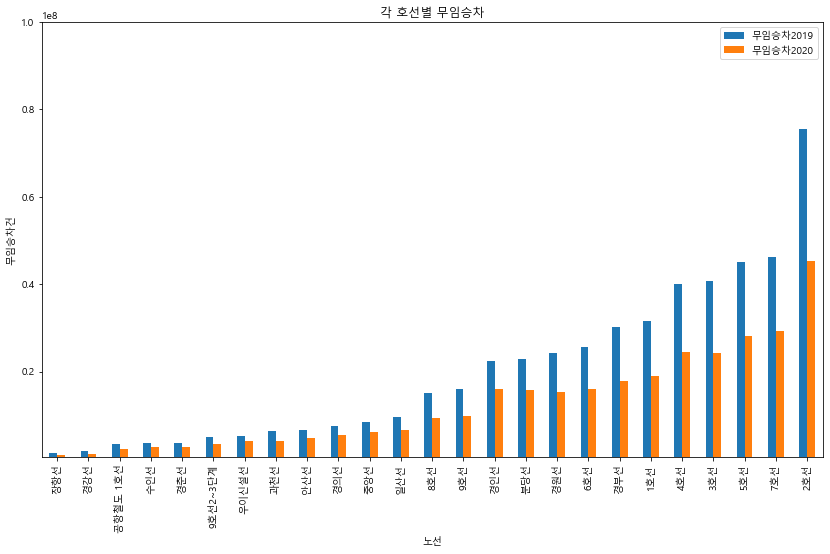

In [11]:
# 각 호선별 무임승차의 합 시각화

final_data_merge.plot(ylim=(500000, 100000000),kind = 'bar', figsize = (14, 8))
plt.title('각 호선별 무임승차')
plt.xlabel('노선')
plt.ylabel('무임승차건')

### 총 승차합 구하는 코드

In [12]:
# 저장할 컬럼 구함
columns_name =['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'FOUR_RIDE_NUM', 'FOUR_ALIGHT_NUM',
       'FIVE_RIDE_NUM', 'FIVE_ALIGHT_NUM', 'SIX_RIDE_NUM', 'SIX_ALIGHT_NUM',
       'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM', 'EIGHT_RIDE_NUM',
       'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM', 'NINE_ALIGHT_NUM', 'TEN_RIDE_NUM',
       'TEN_ALIGHT_NUM', 'ELEVEN_RIDE_NUM', 'ELEVEN_ALIGHT_NUM',
       'TWELVE_RIDE_NUM', 'TWELVE_ALIGHT_NUM', 'THIRTEEN_RIDE_NUM',
       'THIRTEEN_ALIGHT_NUM', 'FOURTEEN_RIDE_NUM', 'FOURTEEN_ALIGHT_NUM',
       'FIFTEEN_RIDE_NUM', 'FIFTEEN_ALIGHT_NUM', 'SIXTEEN_RIDE_NUM',
       'SIXTEEN_ALIGHT_NUM', 'SEVENTEEN_RIDE_NUM', 'SEVENTEEN_ALIGHT_NUM',
       'EIGHTEEN_RIDE_NUM', 'EIGHTEEN_ALIGHT_NUM', 'NINETEEN_RIDE_NUM',
       'NINETEEN_ALIGHT_NUM', 'TWENTY_RIDE_NUM', 'TWENTY_ALIGHT_NUM',
       'TWENTY_ONE_RIDE_NUM', 'TWENTY_ONE_ALIGHT_NUM', 'TWENTY_TWO_RIDE_NUM',
       'TWENTY_TWO_ALIGHT_NUM', 'TWENTY_THREE_RIDE_NUM',
       'TWENTY_THREE_ALIGHT_NUM', 'MIDNIGHT_RIDE_NUM', 'MIDNIGHT_ALIGHT_NUM',
       'ONE_RIDE_NUM', 'ONE_ALIGHT_NUM', 'TWO_RIDE_NUM', 'TWO_ALIGHT_NUM',
       'THREE_RIDE_NUM', 'THREE_ALIGHT_NUM', 'WORK_DT']

# 시작날짜 지정
start_date = date(2019, 1, 1)

# 키값 저장
key = '4263575945776f6c3130356a6d556b53'

# 데이터프레임 생성
final_data2 = pd.DataFrame(columns = columns_name )

# for문을 이용한 크롤링 
for i in range(1, 25):
    target_date = start_date.strftime('%Y%m')
    url = 'http://openapi.seoul.go.kr:8088/%s/json/CardSubwayTime/1/1000/%s/'%(key, target_date )
    result = urllib.request.urlopen(url)
    json_raw_data = result.read()
    json_utf8 = json_raw_data.decode('utf-8')
    json_complete = json.loads(json_utf8)
    monthly_data = pd.DataFrame(json_complete['CardSubwayTime']['row'])
    final_data2= pd.concat([final_data2, monthly_data])
    plus_month = relativedelta(months=1)
    start_date = start_date + plus_month

    
# 데이터 프레임 생성
final_data2

,USE_MON,LINE_NUM,SUB_STA_NM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,...,TWENTY_THREE_ALIGHT_NUM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,WORK_DT
0,201901,경원선,옥수,0.0,0.0,0.0,7.0,19.0,21.0,34.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20190203
1,201901,1호선,서울역,927.0,22.0,10682.0,8774.0,13504.0,45545.0,39110.0,...,19442.0,3612.0,7167.0,0.0,410.0,0.0,0.0,0.0,0.0,20190203
2,201901,1호선,시청,74.0,0.0,2409.0,4049.0,3532.0,19241.0,7703.0,...,4079.0,981.0,1256.0,3.0,29.0,0.0,0.0,0.0,0.0,20190203
3,201901,1호선,종각,100.0,8.0,4409.0,5105.0,4593.0,26969.0,6733.0,...,5560.0,4886.0,1722.0,0.0,0.0,0.0,0.0,0.0,0.0,20190203
4,201901,1호선,종로3가,122.0,4.0,5061.0,2520.0,3876.0,12832.0,6066.0,...,5503.0,3214.0,2471.0,0.0,52.0,0.0,0.0,0.0,0.0,20190203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,202012,중앙선,오빈,0.0,0.0,99.0,1.0,356.0,230.0,690.0,...,65.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,20210103
599,202012,중앙선,양평,10.0,0.0,900.0,29.0,2116.0,1262.0,4918.0,...,1093.0,14.0,179.0,0.0,0.0,0.0,0.0,0.0,0.0,20210103
600,202012,중앙선,원덕,12.0,0.0,276.0,2.0,305.0,58.0,483.0,...,93.0,3.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,20210103
601,202012,중앙선,용문,215.0,1.0,553.0,10.0,1347.0,254.0,2058.0,...,640.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,20210103


In [13]:
# 미사용 컬럼 제거
final_data2.drop(columns = ['WORK_DT'],inplace = True)

In [14]:
# 2019년도 데이터 분리 및 노선별 group by
ride2019 = final_data2[:7171]
ride2019 = ride2019.groupby(['LINE_NUM']) [list(final_data2.loc[:,'FOUR_RIDE_NUM'::2].columns)].sum()
ride2019 = pd.DataFrame(ride2019.sum(axis=1),columns = ['RIDE'])
ride2019.sort_values(by = 'RIDE', axis=0, ascending=True, inplace = True)

ride2019

,RIDE
LINE_NUM,
장항선,5718641.0
경강선,10330834.0
경춘선,14525071.0
우이신설선,16163995.0
수인선,16806916.0
9호선2~3단계,30584049.0
중앙선,36368017.0
경의선,39448985.0
과천선,40860939.0


In [15]:
# 2020년도 데이터 분리 및 노선별 group by

ride2020 = final_data2[7171:]
ride2020 = ride2020.groupby(['LINE_NUM']) [list(final_data2.loc[:,'FOUR_RIDE_NUM'::2].columns)].sum()
ride2020 = pd.DataFrame(ride2020.sum(axis=1),columns = ['RIDE'])
ride2020.sort_values(by = 'RIDE', axis=0, ascending=True, inplace = True)
ride2020 

,RIDE
LINE_NUM,
장항선,3503168.0
경강선,7984289.0
경춘선,10875185.0
우이신설선,12549800.0
수인선,13131225.0
9호선2~3단계,25032548.0
중앙선,26686506.0
공항철도 1호선,27360161.0
과천선,27908510.0


In [16]:
# 2019, 2020년도 컬럼을 노선번호 기준으로 합침

final_data_merge2  = pd.merge(ride2019, ride2020, on = 'LINE_NUM')
final_data_merge2.columns = ['승차2019', '승차2020']
final_data_merge2

,승차2019,승차2020
LINE_NUM,,
장항선,5718641.0,3503168.0
경강선,10330834.0,7984289.0
경춘선,14525071.0,10875185.0
우이신설선,16163995.0,12549800.0
수인선,16806916.0,13131225.0
9호선2~3단계,30584049.0,25032548.0
중앙선,36368017.0,26686506.0
경의선,39448985.0,29739248.0
과천선,40860939.0,27908510.0


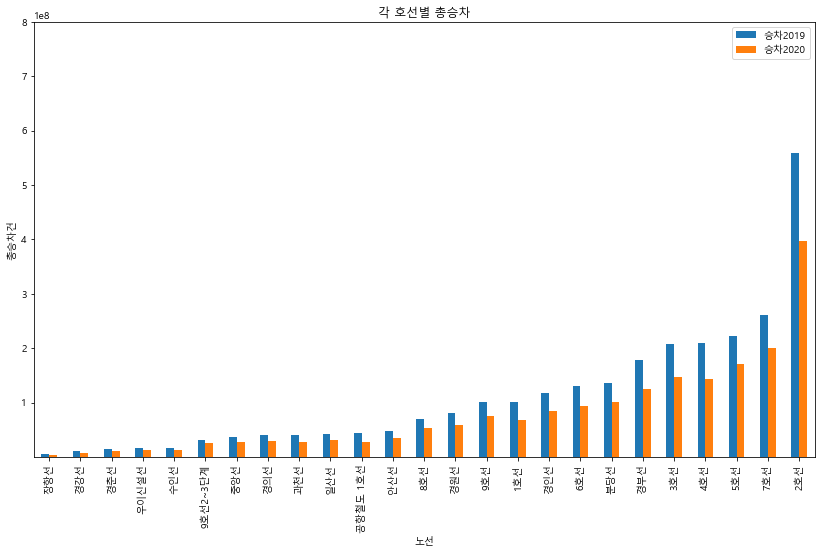

In [17]:
# 데이터 시각화 무임승차와는 단위차이가 많이 나기에 limit 값 조정
final_data_merge2.plot(ylim=(500, 800000000),kind = 'bar', figsize = (14, 8))
plt.title('각 호선별 총승차')
plt.xlabel('노선')
plt.ylabel('총승차건')
plt.show()